In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/vantuan_ngo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [17]:
import importlib
import utils
importlib.reload(utils)
from utils import *
import AD
importlib.reload(AD)
from AD import *
import utils_dataset
importlib.reload(utils_dataset)
from utils_dataset import *

In [3]:
# latent_dim = 2^10
# ae = AE(input_channels=2, latent_dim=latent_dim, img_height=300, img_width=14).to(device)
# latent_dim = 512
# ae = AE(latent_dim=latent_dim).to(device)
ae = AE().to(device)
# print(ae.summary())

Output shape verified: torch.Size([2, 300, 14])
Number of parameters: 77.22M


In [4]:
import os
import pandas as pd
TRAIN_DF_FILE_PATH = os.path.join("../datasets/FccIQ/synthetic/train_df.csv")
print("TRAIN_DF_FILE_PATH: ", TRAIN_DF_FILE_PATH)
train_df = pd.read_csv(TRAIN_DF_FILE_PATH)
print(f'train_df.shape: {train_df.shape}')
print(train_df.head())

# train_df = train_df[train_df["SNR"] <= 10]
# train_df = train_df.sample(n=10, random_state=42)

trains = load_train_dataset(train_df)

import os
import pandas as pd
TEST_DF_FILE_PATH = os.path.join("../datasets/FccIQ/synthetic/test_df.csv")
print("TEST_DF_FILE_PATH: ", TEST_DF_FILE_PATH)
test_df = pd.read_csv(TEST_DF_FILE_PATH)
print(f'test_df.shape: {test_df.shape}')
print(test_df.head())

# test_df = test_df[test_df["SNR"] <= 10]
# train_df = train_df.sample(n=10, random_state=42)

tests = load_test_dataset_normal(test_df)

print(f'train_df.shape: {train_df.shape}')
print(f'test_df.shape: {test_df.shape}')

print(f'trains.shape: {trains.shape}')
print(f'tests.shape: {tests.shape}')

print(f'train_df.shape: {train_df["SNR"].unique()}')
print(f'test_df.shape: {test_df["SNR"].unique()}')

TRAIN_DF_FILE_PATH:  ../datasets/FccIQ/synthetic/train_df.csv
train_df.shape: (9844, 7)
   SNR  SIR  MCS  FRQ  Slot  \
0    1   -1    1   -1     1   
1    1   -1    1   -1     2   
2    1   -1    1   -1     4   
3    1   -1    1   -1     5   
4    1   -1    1   -1     6   

                                           file_path  ground_truth_file_path  
0  /home/vantuan_ngo/anomalib-example/FccIQ/../da...                     NaN  
1  /home/vantuan_ngo/anomalib-example/FccIQ/../da...                     NaN  
2  /home/vantuan_ngo/anomalib-example/FccIQ/../da...                     NaN  
3  /home/vantuan_ngo/anomalib-example/FccIQ/../da...                     NaN  
4  /home/vantuan_ngo/anomalib-example/FccIQ/../da...                     NaN  
TEST_DF_FILE_PATH:  ../datasets/FccIQ/synthetic/test_df.csv
test_df.shape: (23374, 7)
   SNR  SIR  MCS  FRQ  Slot  \
0    1   -1    1   -1     3   
1    1   -1    1   -1    11   
2    1   -1    1   -1    12   
3    1   -1    1   -1    17   
4    1   -

In [5]:
batch_size = 128
train_loader = DataLoader(trains, batch_size=batch_size, shuffle=True)
i, data = next(enumerate(train_loader))
print(i)
print(data.shape)
print(len(train_loader.dataset))

test_loader = DataLoader(tests, batch_size=batch_size, shuffle=False)
i, data = next(enumerate(test_loader))
print(i)
print(data.shape)
print(len(test_loader.dataset))

0
torch.Size([128, 2, 300, 14])
9844
0
torch.Size([128, 2, 300, 14])
2462


In [8]:
epochs = 500
beta = 0.1
# train_VAE(ae, train_loader, epochs=epochs, learning_rate=1e-5, beta=beta, device=device)
train_AE(ae, train_loader, epochs=epochs, learning_rate=1e-5, device=device)
# train_autoencoder(ae, train_loader, epochs=epochs)
# train_autoencoder(ae, train_loader, num_epochs=epochs, lr=1e-3, device=device)

Epoch 1/500, Loss: 61.908319
Epoch 2/500, Loss: 58.472975
Epoch 3/500, Loss: 57.073334
Epoch 4/500, Loss: 56.369339
Epoch 5/500, Loss: 55.977165
Epoch 6/500, Loss: 55.745181
Epoch 7/500, Loss: 55.586576
Epoch 8/500, Loss: 55.473722
Epoch 9/500, Loss: 55.386345
Epoch 10/500, Loss: 55.314995
Epoch 11/500, Loss: 55.252226
Epoch 12/500, Loss: 55.203240
Epoch 13/500, Loss: 55.157771
Epoch 14/500, Loss: 55.111649
Epoch 15/500, Loss: 55.063717
Epoch 16/500, Loss: 55.023997
Epoch 17/500, Loss: 54.983052
Epoch 18/500, Loss: 54.945624
Epoch 19/500, Loss: 54.909563
Epoch 20/500, Loss: 54.867168
Epoch 21/500, Loss: 54.832431
Epoch 22/500, Loss: 54.792076
Epoch 23/500, Loss: 54.755408
Epoch 24/500, Loss: 54.721521
Epoch 25/500, Loss: 54.680547
Epoch 26/500, Loss: 54.645291
Epoch 27/500, Loss: 54.607201
Epoch 28/500, Loss: 54.573801
Epoch 29/500, Loss: 54.535453
Epoch 30/500, Loss: 54.505256
Epoch 31/500, Loss: 54.473355
Epoch 32/500, Loss: 54.440002
Epoch 33/500, Loss: 54.403617
Epoch 34/500, Loss:

In [9]:
# Determine anomaly threshold
ae.eval()
total_loss = 0
with torch.no_grad():
    for data in train_loader:
        data = data.to(device)
        recon= ae(data)
        # print(recon.shape)
        # print(data.shape)
        loss = nn.functional.mse_loss(recon, data, reduction='sum')
        total_loss += loss.cpu().numpy()

print(f"len(train_loader.dataset): {len(train_loader.dataset)}")
print(f"total_loss: {total_loss}")
print(f"average loss: {total_loss/len(train_loader.dataset)}")

len(train_loader.dataset): 9844
total_loss: 412886.90625
average loss: 41.94300079345703


In [10]:
# Determine anomaly threshold
ae.eval()
total_loss = 0
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        recon = ae(data)
        # print(recon.shape)
        # print(data.shape)
        loss = nn.functional.mse_loss(recon, data, reduction='sum')
        total_loss += loss.cpu().numpy()

print(f"len(test_loader.dataset): {len(test_loader.dataset)}")
print(f"total_loss: {total_loss}")
print(f"average loss: {total_loss/len(test_loader.dataset)}")

len(test_loader.dataset): 2462
total_loss: 2070678.5
average loss: 841.055419921875


Reconstruction MSE: 0.015258
loss:  tensor(1.9557, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.403413
Recon max: 2.218051
anomaly_map.shape: (300, 14)


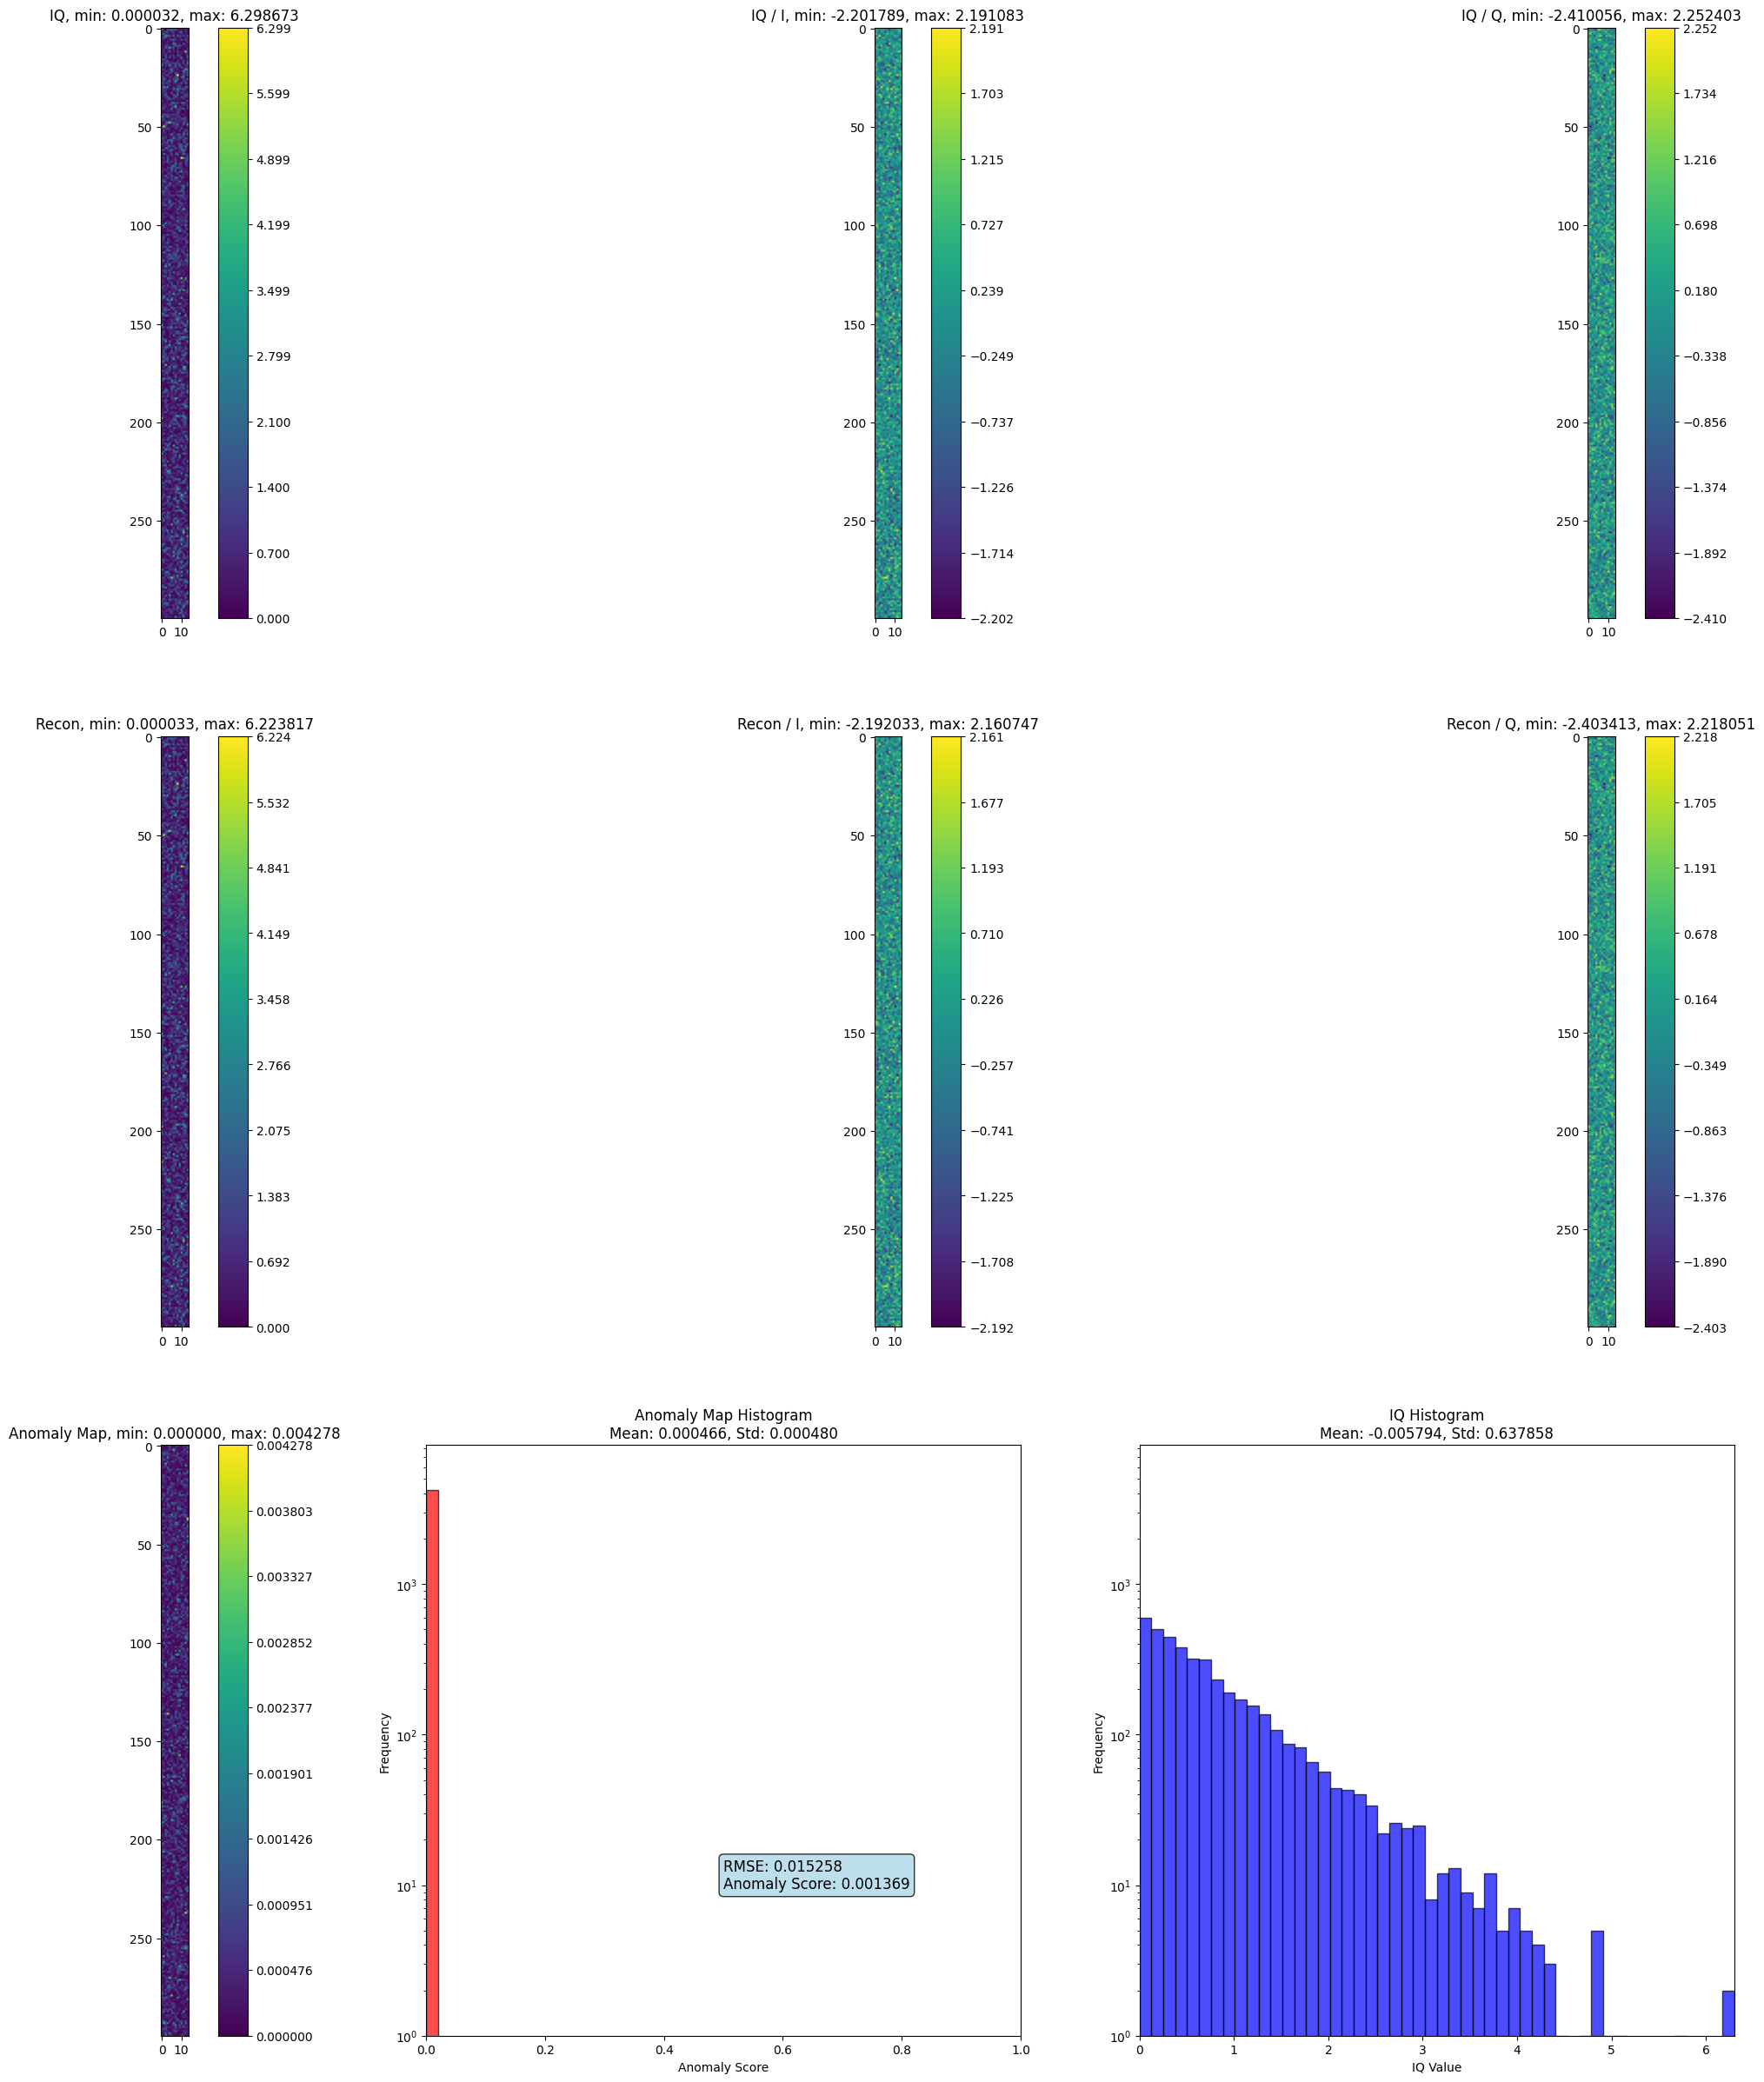

In [18]:
# Load and visualize a test sample
test_file_path = train_df.iloc[0]["file_path"]
test_AE(test_file_path, ae, device)

In [198]:
gen_report_db(tests, ae, device, "tests_ae.pdf")

datasets.shape: torch.Size([2462, 2, 300, 14])
Processing 0/2462
Reconstruction MSE: 0.677398
loss:  tensor(3854.4863, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -1.547520
Recon max: 1.343063
anomaly_map.shape: (300, 14)
Processing 1/2462
Reconstruction MSE: 0.692237
loss:  tensor(4025.2173, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -1.243955
Recon max: 1.485897
anomaly_map.shape: (300, 14)
Processing 2/2462
Reconstruction MSE: 0.681268
loss:  tensor(3898.6609, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -1.257763
Recon max: 1.402643
anomaly_map.shape: (300, 14)
Processing 3/2462
Reconstruction MSE: 0.688840
loss:  tensor(3985.8025, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -1.2

/home/vantuan_ngo/anomalib-example/FccIQ/utils.py:333: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30, 30))


Processing 9/2462
Reconstruction MSE: 0.413608
loss:  tensor(1437.0040, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -1.096346
Recon max: 1.409146
anomaly_map.shape: (300, 14)
Processing 10/2462
Reconstruction MSE: 0.410065
loss:  tensor(1412.4875, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -1.337233
Recon max: 1.094377
anomaly_map.shape: (300, 14)
Processing 11/2462
Reconstruction MSE: 0.408654
loss:  tensor(1402.7872, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -1.092253
Recon max: 1.126392
anomaly_map.shape: (300, 14)
Building PDF
PDF built at:  tests_ae.pdf


In [20]:
gen_report_db(trains, ae, device, "trains_ae.pdf", num_samples=1000)

datasets.shape: torch.Size([9844, 2, 300, 14])
Processing 0/9844
Reconstruction MSE: 0.015258
loss:  tensor(1.9557, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.403413
Recon max: 2.218051
anomaly_map.shape: (300, 14)
Processing 1/9844
Reconstruction MSE: 0.016207
loss:  tensor(2.2064, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.326507
Recon max: 2.794360
anomaly_map.shape: (300, 14)
Processing 2/9844
Reconstruction MSE: 0.014988
loss:  tensor(1.8870, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.272340
Recon max: 2.742568
anomaly_map.shape: (300, 14)
Processing 3/9844
Reconstruction MSE: 0.015262
loss:  tensor(1.9565, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.420373
Recon 

/home/vantuan_ngo/anomalib-example/FccIQ/utils.py:333: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30, 30))


Processing 9/9844
Reconstruction MSE: 0.015759
loss:  tensor(2.0861, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.457128
Recon max: 2.297464
anomaly_map.shape: (300, 14)
Processing 10/9844
Reconstruction MSE: 0.015546
loss:  tensor(2.0300, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.430359
Recon max: 2.459129
anomaly_map.shape: (300, 14)
Processing 11/9844
Reconstruction MSE: 0.015788
loss:  tensor(2.0939, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.073346
Recon max: 2.807835
anomaly_map.shape: (300, 14)
Processing 12/9844
Reconstruction MSE: 0.015129
loss:  tensor(1.9226, device='cuda:0')
Original shape: torch.Size([1, 2, 300, 14])
Reconstructed shape: torch.Size([1, 2, 300, 14])
Recon min: -2.355994
Recon max: 2.229452
anomaly_map.shape: (300, 14)
P